In [4]:
import csv
from operator import itemgetter
with open('D:/BI_Developer_HW/BI_Developer_HW/NEISS2014.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
    header = data[0]
    new_data = data[1:len(data)]
    
    body_part = [row[11] for row in new_data]
    
    body_part_count = {}
    for part in body_part:
        if part in body_part_count:
            body_part_count[part] += 1
        else:
            body_part_count[part] = 1
            
    sorted_list = sorted(body_part_count.items(), key = itemgetter(1), reverse = True)
    print(sorted_list)

[('75', 9891), ('76', 5786), ('92', 5783), ('79', 5717), ('31', 3868), ('37', 3781), ('35', 3616), ('82', 3369), ('83', 3090), ('30', 2675), ('33', 2561), ('36', 2239), ('34', 2116), ('32', 1612), ('85', 1422), ('93', 1280), ('88', 1254), ('89', 1080), ('77', 847), ('94', 782), ('81', 756), ('80', 745), ('0', 549), ('87', 390), ('38', 286), ('84', 4)]


In [9]:
# import csv
import csv,re
with open('D:/BI_Developer_HW/BI_Developer_HW/NEISS2014.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
    header = data[0]
    new_data = data[1:len(data)]    
    
    age = [int(row[5]) for row in new_data]
    sex = [row[6] for row in new_data]
    narrative = [row[17] for row in new_data]  
    
    total_age_skateboard_injuries = 0
    skateboard_count = 0
    male_count = 0
    female_count = 0
    for i, sent in enumerate(narrative):
        if re.search('SKATEBOARD', sent) is not None:
            if sex[i] == 'Male' is not None:
                male_count += 1
            else:
                female_count += 1
            skateboard_count += 1
        else:
            pass        
    
    print(skateboard_count) # Number of injuries involving a skateboard
    print(male_count) # Number of male injuries involving a skateboard
    print(female_count) # Number of female injuries involving a skateboard    
    print((male_count * 100) / skateboard_count) # Percentage of male injuries involving a skateboard
    print((female_count * 100) / skateboard_count) # Percentage of female injuries involving a skateboard

466
384
82
82.40343347639485
17.59656652360515


In [13]:
for i, sent in enumerate(narrative):
        if re.search('SKATEBOARD', sent) is not None:
            total_age_skateboard_injuries += age[i]
        else:
            pass
average_age = (total_age_skateboard_injuries / skateboard_count)
    
print(total_age_skateboard_injuries)
print(average_age)

16768
35.98283261802575


In [16]:
import csv
from operator import itemgetter    

disposition = [row[12] for row in new_data]
diag = [row[9] for row in new_data]    

hospitalization_count = {}
not_seen_count = {}
for i, no in enumerate(disposition):
    if no == '4' is not None:
        if diag[i] in hospitalization_count:
            hospitalization_count[diag[i]] += 1
        else:
            hospitalization_count[diag[i]] = 1
    elif no == '6' is not None:
        if diag[i] in not_seen_count:
            not_seen_count[diag[i]] += 1
        else:
            not_seen_count[diag[i]] = 1
    else:
        pass
sorted_hospitalization_count = sorted(hospitalization_count.items(), key = itemgetter(1), reverse = True)
sorted_not_seen_count = sorted(not_seen_count.items(), key = itemgetter(1), reverse = True)
print(sorted_hospitalization_count) 
print(sorted_not_seen_count)

[('57', 1811), ('62', 630), ('71', 613), ('53', 217), ('59', 185), ('68', 88), ('52', 70), ('41', 56), ('55', 43), ('64', 43), ('58', 42), ('48', 29), ('51', 27), ('69', 23), ('50', 20), ('61', 17), ('63', 15), ('65', 13), ('72', 12), ('56', 10), ('42', 5), ('67', 3), ('60', 2), ('74', 2), ('47', 2), ('66', 1)]
[('71', 257), ('59', 123), ('62', 63), ('53', 52), ('68', 24), ('64', 21), ('58', 12), ('51', 10), ('56', 10), ('63', 7), ('52', 7), ('57', 6), ('48', 5), ('60', 4), ('55', 3), ('65', 3), ('49', 2), ('42', 2), ('74', 2), ('50', 2), ('72', 2), ('41', 1), ('73', 1)]


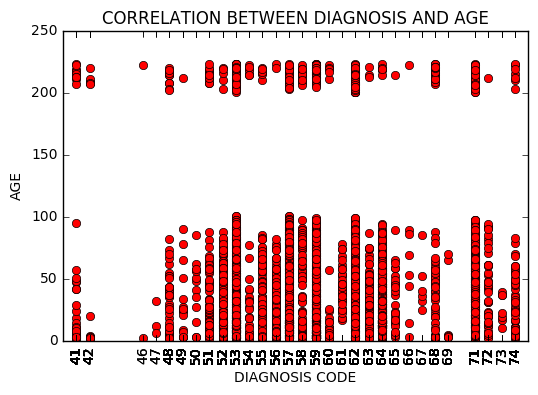

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

NEISS_2014 = pd.read_csv('D:/BI_Developer_HW/BI_Developer_HW/NEISS2014.csv')
first_ten_thousand = NEISS_2014[:10000]
plt.plot(first_ten_thousand['diag'], first_ten_thousand['age'], 'ro')
plt.xticks(first_fifty['diag'], rotation = 90)
plt.xlim([40,75])
plt.xlabel('DIAGNOSIS CODE')
plt.ylabel('AGE')
# plt.legend(loc = 'upper right')
plt.title('CORRELATION BETWEEN DIAGNOSIS AND AGE')
plt.show()

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt

NEISS_2014 = pd.read_csv('D:/BI_Developer_HW/BI_Developer_HW/NEISS2014.csv')
first_five = NEISS_2014[:5]
next_five = NEISS_2014[5:10]

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(first_five['diag'],first_five['age'], 'ro')
ax2.plot(next_five['diag'],next_five['age'], 'ro')
plt.show()'''

'''import pandas as pd
import matplotlib.pyplot as plt

first_five = NEISS_2014[:5]
fig, ax = plt.subplots()
ax.hist(first_five['diag'], first_five['age'], range = (0,5))

plt.show()'''